In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('houseprice_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [5]:
df.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [6]:
for var in df.columns[:-1]:
    print(df[var].value_counts(dropna=False))

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64


### GarageQual

<AxesSubplot:>

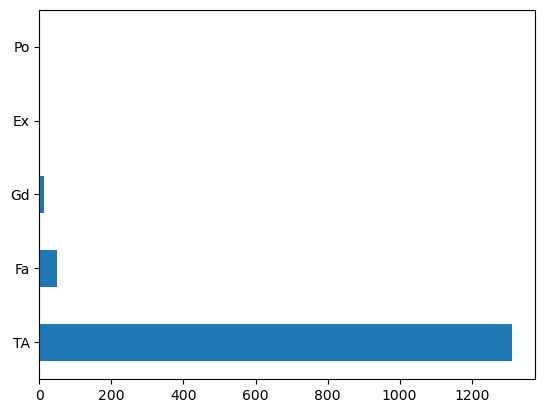

In [7]:
df.GarageQual.value_counts().plot(kind='barh')

In [8]:
df.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

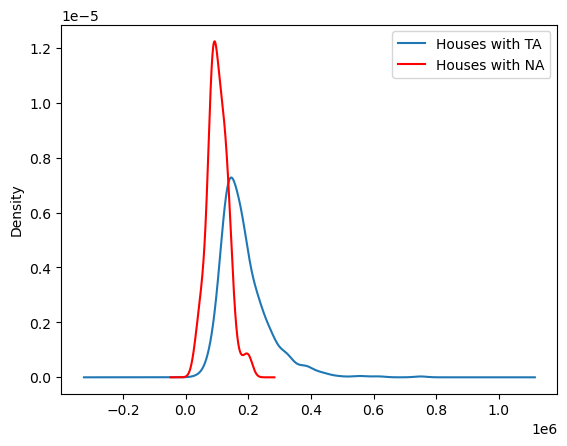

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df.GarageQual == 'TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df.GarageQual.isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels= ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

In [10]:
temp = df[df.GarageQual == 'TA']['SalePrice']

In [11]:
df['GarageQual'].fillna(df.GarageQual.mode()[0],inplace=True)

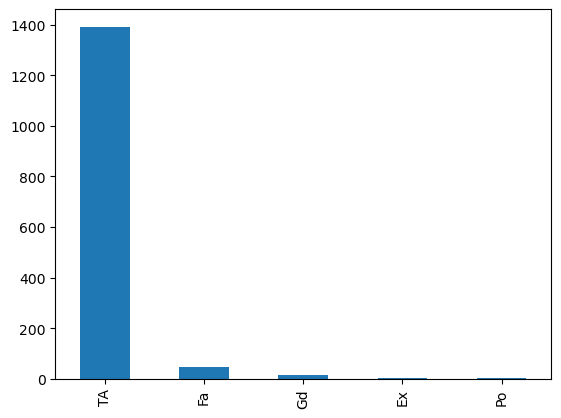

In [12]:
df.GarageQual.value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'GarageQual')

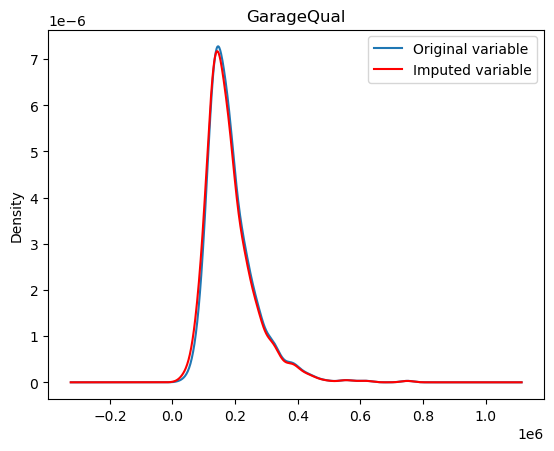

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

### FireplaceQu

<AxesSubplot:>

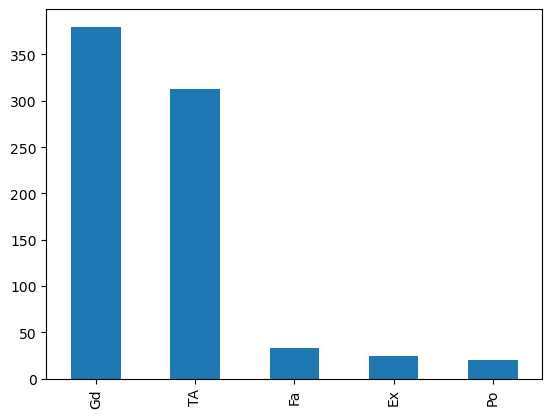

In [14]:
df.FireplaceQu.value_counts().plot(kind='bar')

In [15]:
mode = df.FireplaceQu.mode()[0]

In [16]:
mode

'Gd'

Text(0.5, 1.0, 'FireplaceQu')

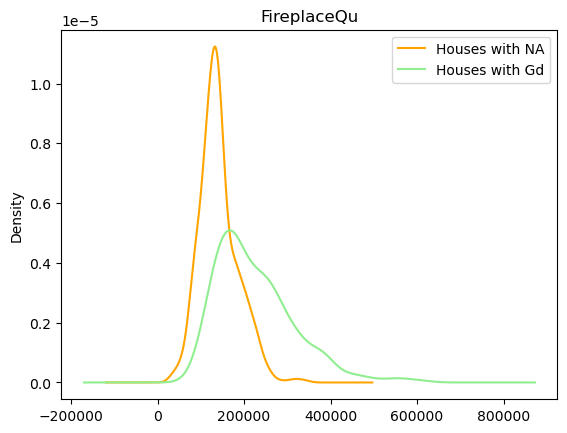

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df.FireplaceQu.isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='orange')

df[df.FireplaceQu == mode]['SalePrice'].plot(kind='kde',ax=ax, color='lightgreen')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with NA','Houses with Gd']
ax.legend(lines, labels,loc='best')
plt.title('FireplaceQu')

In [18]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [19]:
df.FireplaceQu.fillna(mode, inplace=True)

<AxesSubplot:>

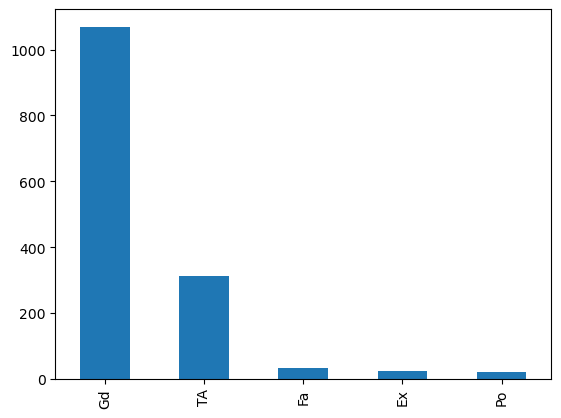

In [20]:
df.FireplaceQu.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

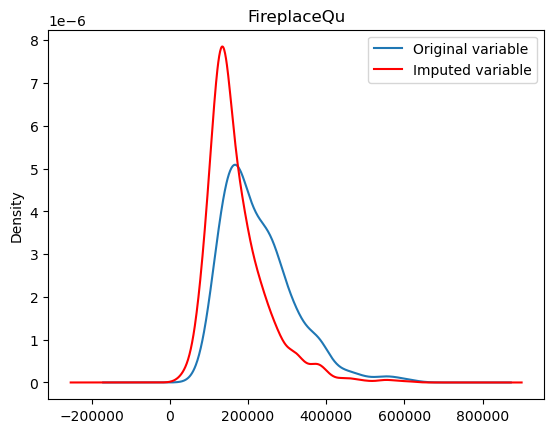

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df.FireplaceQu == mode]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels,loc='best')
plt.title('FireplaceQu')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy='most_frequent')

In [31]:
X_train = imputer.fit_transform(X_train)

In [32]:
X_test = imputer.transform(X_test)

In [33]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)